Transfer learning, dense network using data already run through Inception V3

In [1]:
import numpy as np
import tensorflow as tf
import time
from tensorflow.python.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Model, Sequential, load_model
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_test_path = '../datacsv/x_test'

x_train = np.genfromtxt('../datacsv2/x_train.csv', delimiter=',')
y_train = np.genfromtxt('../datacsv2/y_train.csv', delimiter=',')

x_val = np.genfromtxt('../datacsv/x_val.csv', delimiter=',')
y_val = np.genfromtxt('../datacsv/y_val.csv', delimiter=',')

x_test = np.genfromtxt('../datacsv/x_test.csv', delimiter=',')
y_test = np.genfromtxt('../datacsv/y_test.csv', delimiter=',')



In [3]:
# setup parameters
num_classes = 8

# hyper-parameters
lam = 0.00088
batch_size = 128
lr = 0.000275
beta_1 = 0.9
beta_2 = 0.999
fcnum = 0
layer_size = 350

In [4]:
inputs = Input(shape=(x_val.shape[1],))
x = Dense(layer_size, activation='relu', kernel_regularizer=regularizers.l2(lam))(inputs)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

In [5]:
#set optimizer and loss 
opt = tf.keras.optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2)
loss = 'categorical_crossentropy'

#compile model
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [6]:
epochs = 100
c1 = ModelCheckpoint('trans_latest.h5', monitor='val_loss', verbose=0, save_best_only=True)
history = model.fit(x=x_train, 
          y=y_train,
          batch_size=batch_size, 
          epochs=epochs,
          validation_data = (x_val, y_val),
          callbacks = [c1])

Train on 44192 samples, validate on 1030 samples
Epoch 1/100
44192/44192 [==============================] - 3s 62us/step - loss: 2.0109 - acc: 0.4211 - val_loss: 1.7251 - val_acc: 0.5107
Epoch 2/100
44192/44192 [==============================] - 2s 43us/step - loss: 1.5839 - acc: 0.5491 - val_loss: 1.5369 - val_acc: 0.5563
Epoch 3/100
44192/44192 [==============================] - 2s 43us/step - loss: 1.4138 - acc: 0.5975 - val_loss: 1.3983 - val_acc: 0.6117
Epoch 4/100
44192/44192 [==============================] - 2s 43us/step - loss: 1.3135 - acc: 0.6239 - val_loss: 1.3931 - val_acc: 0.6126
Epoch 5/100
44192/44192 [==============================] - 2s 43us/step - loss: 1.2370 - acc: 0.6478 - val_loss: 1.3241 - val_acc: 0.6194
Epoch 6/100
44192/44192 [==============================] - 2s 43us/step - loss: 1.1809 - acc: 0.6620 - val_loss: 1.2798 - val_acc: 0.6466
Epoch 7/100
44192/44192 [==============================] - 2s 43us/step - loss: 1.1446 - acc: 0.6734 - val_loss: 1.2632 - v

44192/44192 [==============================] - 2s 43us/step - loss: 0.5598 - acc: 0.8892 - val_loss: 1.0400 - val_acc: 0.7214
Epoch 60/100
44192/44192 [==============================] - 2s 42us/step - loss: 0.5500 - acc: 0.8941 - val_loss: 1.0992 - val_acc: 0.7107
Epoch 61/100
44192/44192 [==============================] - 2s 42us/step - loss: 0.5455 - acc: 0.8961 - val_loss: 1.0648 - val_acc: 0.7223
Epoch 62/100
44192/44192 [==============================] - 2s 42us/step - loss: 0.5352 - acc: 0.8991 - val_loss: 1.0398 - val_acc: 0.7272
Epoch 63/100
44192/44192 [==============================] - 2s 43us/step - loss: 0.5394 - acc: 0.8972 - val_loss: 1.0312 - val_acc: 0.7262
Epoch 64/100
44192/44192 [==============================] - 2s 43us/step - loss: 0.5285 - acc: 0.9025 - val_loss: 1.0168 - val_acc: 0.7408
Epoch 65/100
44192/44192 [==============================] - 2s 44us/step - loss: 0.5223 - acc: 0.9051 - val_loss: 1.0444 - val_acc: 0.7330
Epoch 66/100
44192/44192 [==============

In [7]:
print(max(history.history['val_acc']))

0.7504854368932039


In [8]:
#model = load_model('trans_latest.h5')
model.evaluate(x=x_test, y=y_test)

576/576 [==============================] - 0s 57us/step


[1.026379966073566, 0.7100694444444444]

In [20]:
from tensorflow.python.keras.metrics import top_k_categorical_accuracy

y_pred = model.predict(x_val)

top2 = top_k_categorical_accuracy(y_val, y_pred, k=2)

print(tf.keras.backend.eval(top2))

0.86213595


[[ 76   1   6  10   8   4   3   1]
 [  2 103   4   3  16   5   1   0]
 [  4   0  91   3   2   8   2   6]
 [ 12   0   9  93   7   4   1   4]
 [  2   6   4   3 112   8   0   3]
 [  4   4   5   4   6  93   2   1]
 [  1   0  14  10   4  17 101   1]
 [  3   2  10   3   3  17   4  94]]


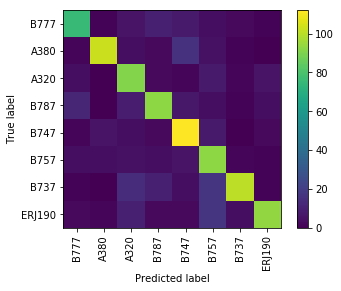

In [9]:
# confusion matrix
preds = model.predict(x=x_val)
truth = y_val

confusion = np.zeros((num_classes,num_classes), dtype='int')

for i in range(preds.shape[0]):
    pr = np.argmax(preds[i,:])
    tr = np.argmax(truth[i,:])
    
    confusion[tr,pr] += 1

print(confusion)

import matplotlib.pyplot as plt
%matplotlib inline

#classes = ['A320', 'A380', 'B737', 'B747', 'B757', 'B777', 'B787', 'ERJ190']
classes = ['B777', 'A380', 'A320', 'B787', 'B747', 'B757', 'B737', 'ERJ190']
plt.imshow(confusion)
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

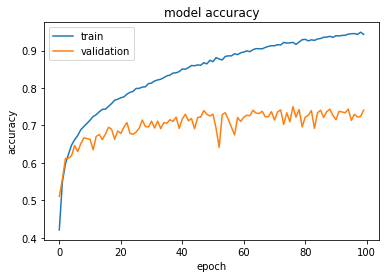

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
np.unravel_index(np.argsort(-truth-preds, axis=None)[18], preds.shape) #most confident picture

(498, 4)

In [25]:
picnum =546
cl = 4
pic_path = '../dataset3/val/Boeing747/B747 (2894).jpg'    #ERJ190/ERJ190 (16).jpg'  #Boeing747/B747 (2894).jpg'#, 546

input_tensors = [model.input]
gradients = model.optimizer.get_gradients(model.output[0][cl], model.input)

gfun = tf.keras.backend.function(inputs = input_tensors, outputs = gradients)

g1 = gfun([np.expand_dims(x_val[picnum,:], axis=0)])[0]

In [26]:
import tensorflow_hub as hub
mod_path = 'https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1'

module_spec = hub.load_module_spec(mod_path)
height, width = hub.get_expected_image_size(module_spec)

with tf.Graph().as_default() as graph:
    resized_input_tensor = tf.placeholder(tf.float32, [None, height, width, 3])
    m = hub.Module(module_spec)
    bottleneck_tensor = m(resized_input_tensor)
    
    batch_size, bottleneck_tensor_size = bottleneck_tensor.get_shape().as_list()
    print(bottleneck_tensor_size)
    print(height, width) 


    jpeg_data = tf.placeholder(tf.string, name='DecodeJPGInput')
    decoded_image = tf.image.decode_jpeg(jpeg_data, channels=3)
    # Convert from full range of uint8 to range [0,1] of float32.
    decoded_image_as_float = tf.image.convert_image_dtype(decoded_image,
                                                        tf.float32)
    decoded_image_4d = tf.expand_dims(decoded_image_as_float, 0)
    resize_shape = tf.stack([height, width])
    resize_shape_as_int = tf.cast(resize_shape, dtype=tf.int32)
    resized_image = tf.image.resize_bilinear(decoded_image_4d,
                                           resize_shape_as_int)
    resized_image = resized_image/tf.sqrt(tf.image.total_variation(resized_image))
    
    sess = tf.Session(graph=graph)
    init = tf.global_variables_initializer()
    sess.run(init)     

INFO:tensorflow:Initialize variable module/InceptionV3/Conv2d_1a_3x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Conv2d_1a_3x3/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Conv2d_1a_3x3/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Conv2d_1a_3x3/weights
INFO:tensorflow:Initialize variable module/InceptionV3

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5b/Branch_2/Conv2d_0b_3x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff4215

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5c/Branch_2/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5c/Branch_2/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variab

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5d/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5d/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5d/Branch_2/Conv2d_0b_3x3/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5d/Branch_2/Conv2d_0b_3x3/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5d/Branch_2/Conv2d_0c_3x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5d/Branch_2/Conv2d_0c_3x3/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5d/Branch_2/Conv2d_0c_3x3/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/va

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_1/Conv2d_0b_1x7/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff4215

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_2/Conv2d_0e_1x7/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_2/Conv2d_0e_1x7/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variab

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6c/Branch_2/Conv2d_0c_1x7/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6c/Branch_2/Conv2d_0c_1x7/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6c/Branch_2/Conv2d_0c_1x7/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6c/Branch_2/Conv2d_0c_1x7/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6c/Branch_2/Conv2d_0d_7x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6c/Branch_2/Conv2d_0d_7x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6c/Branch_2/Conv2d_0d_7x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/va

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6d/Branch_2/Conv2d_0b_7x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff4215

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_1/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_1/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variab

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_3/Conv2d_0b_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_3/Conv2d_0b_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7a/Branch_0/Conv2d_0a_1x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7a/Branch_0/Conv2d_0a_1x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7a/Branch_0/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/va

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_1/Conv2d_0b_1x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff4215

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_3/Conv2d_0b_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7b/Branch_3/Conv2d_0b_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variab

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_2/Conv2d_0d_3x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_2/Conv2d_0d_3x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_2/Conv2d_0d_3x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_2/Conv2d_0d_3x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_3/Conv2d_0b_1x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_3/Conv2d_0b_1x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/va

In [29]:
image_data = tf.gfile.FastGFile(pic_path, 'rb').read()
resized_input_values = sess.run(resized_image, {jpeg_data: image_data})

dloss = tf.gradients(bottleneck_tensor, resized_input_tensor)    
dl = sess.run(dloss, feed_dict={bottleneck_tensor:g1, resized_input_tensor:resized_input_values})    
dl = np.squeeze(np.array(dl))
saliency = np.amax(np.abs(dl), axis=-1, keepdims=False)*100


In [15]:
saliency.shape

(299, 299)

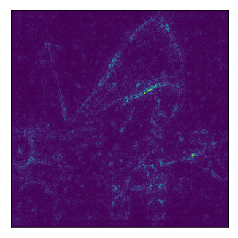

In [30]:
plt.imshow(saliency)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [17]:
dcat = 'val'
datapath_orig = '../dataset3/'+dcat


#train
sub_dirs = tf.gfile.Walk(datapath_orig)

num_pics = 0
root = True
class_path = []
img_paths = []
for x in sub_dirs:
    if root:
        class_ids = x[1]
        num_classes = len(x[1])
        root = False
        continue
    class_path.append(x[0])
    img_paths.append(x[2])
    num_pics += len(x[2])
    
print(dcat)
print('num classes', num_classes)
print('num pics', num_pics)
print(class_ids)
#print(class_path)

npic = 0
for i in range(num_classes):
    pths=img_paths[i]
    for k in range(len(pths)):
        print(npic, pths[k])
        npic+=1

val
num classes 8
num pics 1030
['Boeing777', 'Airbus380', 'Airbus320', 'Boeing787', 'Boeing747', 'Boeing757', 'Boeing737', 'ERJ190']
0 B777 (1490).jpg
1 B777 (565).jpg
2 B777 (1274).jpg
3 B777 (439).jpg
4 B777 (2568).jpg
5 B777 (838).jpg
6 B777 (2297).jpg
7 B777 (2557).jpg
8 B777 (2532).jpg
9 B777 (1367).jpg
10 B777 (1856).jpg
11 B777 (2879).jpg
12 B777 (2328).jpg
13 B777 (2700).jpg
14 B777 (206).jpg
15 B777 (1053).jpg
16 B777 (1269).jpg
17 B777 (2524).jpg
18 B777 (2398).jpg
19 B777 (1234).jpg
20 B777 (2162).jpg
21 B777 (2920).jpg
22 B777 (1762).jpg
23 B777 (2520).jpg
24 B777 (2370).jpg
25 B777 (1847).jpg
26 B777 (429).jpg
27 B777 (2107).jpg
28 B777 (800).jpg
29 B777 (2651).jpg
30 B777 (2519).jpg
31 B777 (934).jpg
32 B777 (2748).jpg
33 B777 (1094).jpg
34 B777 (2445).jpg
35 B777 (2602).jpg
36 B777 (2021).jpg
37 B777 (633).jpg
38 B777 (1699).jpg
39 B777 (916).jpg
40 B777 (507).jpg
41 B777 (2958).jpg
42 B777 (2282).jpg
43 B777 (890).jpg
44 B777 (404).jpg
45 B777 (1147).jpg
46 B777 (982).